In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Vectors

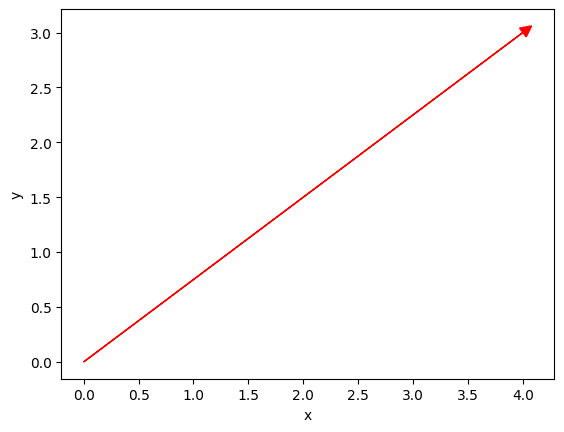

In [67]:
# Create a figure and axis
fig, ax = plt.subplots()

# Add arrow on the edge
ax.arrow(0, 0, 4, 3, head_width=0.1, head_length=0.1, fc='red', ec='red')

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

In [31]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation

In [32]:
class Arrow3D(FancyArrowPatch):
    
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 

In [33]:
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

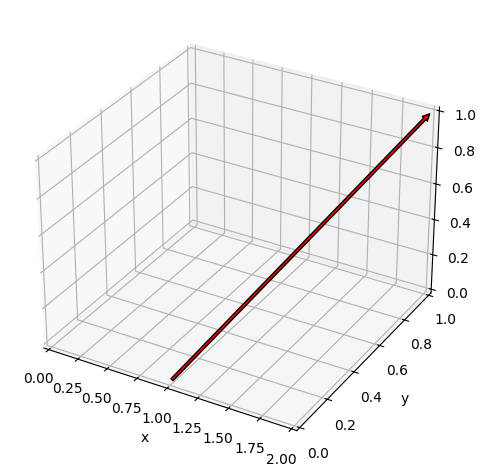

In [58]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0, 2)

ax.arrow3D(1,0,0,
           1,1,1,
           mutation_scale=10, 
           fc='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.tight_layout()

In [48]:
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

In [21]:
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

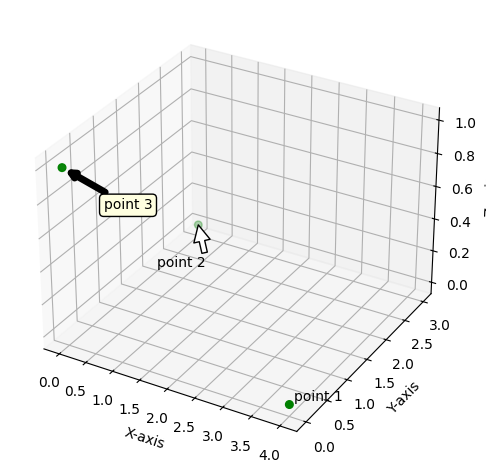

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# adding a few 3d points to annotate
ax.scatter([4, 0, 0], [0, 3, 0], [0, 0, 1], s=30, marker='o', color='green')
ax.annotate3D('point 1', (4, 0, 0), xytext=(3, 3), textcoords='offset points')
ax.annotate3D('point 2', (0, 3, 0),
              xytext=(-30, -30),
              textcoords='offset points',
              arrowprops=dict(ec='black', fc='white', shrink=2.5))
ax.annotate3D('point 3', (0, 0, 1),
              xytext=(30, -30),
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=5))


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

fig.tight_layout()

### Vector Norm

In [75]:
vector = np.array([4, 3])

In [76]:
l1_norm = np.linalg.norm(vector, 1)

In [77]:
l1_norm

7.0

In [78]:
l2_norm = np.linalg.norm(vector, 2)

In [79]:
l2_norm

5.0

### Vector Direction

In [80]:
vector = np.array([4, 3])

In [ ]:
# Calculate the magnitude of the vector
magnitude = np.linalg.norm(vector)

In [ ]:
# Calculate the unit vector (direction)
direction = vector / magnitude

In [101]:
direction

array([0.8, 0.6])

In [ ]:
# Calculate the angle (count) of the vector with respect to the x-axis
angle_x = np.arctan2(vector[1], vector[0])

In [102]:
angle_x

0.6435011087932844

In [ ]:
# Convert the angle from radians to degrees
angle_x_degrees = np.degrees(angle_x)

In [103]:
angle_x_degrees

36.86989764584402

### Vector Addition and Subtraction

In [96]:
# Define two vectors
vector1 = np.array([4, 1])
vector2 = np.array([1, 3])

In [97]:
# Vector addition
sum_vector = vector1 + vector2

In [98]:
sum_vector

array([5, 4])

In [99]:
# Vector subtraction
diff_vector = vector1 - vector2

In [100]:
diff_vector

array([ 3, -2])

### Vector Distance

In [106]:
# Define two vectors
vector1 = np.array([6, 2])
vector2 = np.array([1, 5])

In [110]:
l1_distance = np.linalg.norm(vector1 - vector2, 1)

In [111]:
l1_distance

8.0

In [112]:
l2_distance = np.linalg.norm(vector1 - vector2, 2)

In [113]:
l2_distance

5.830951894845301

In [116]:
from scipy.spatial.distance import cosine

In [117]:
cosine_distance = cosine(vector1, vector2)

In [118]:
cosine_distance

0.5038610616431661

### Keypoints

- Vector is a magnitude and a direction
- Magnitude of a vector is the distance from the endpoint of the vector to the origin (length)
- Norm is a function from vector space that behaves in certain ways like the distance from the origin
    - L1 norm: the sum of the absolute values of the vector.
    - L2 norm: the square root of the sum of the squared vector values.
- Direction of a vector is the angle made by the vector with the horizontal axis, that is, the X-axis.

### References

- https://web.stanford.edu/class/nbio228-01/handouts/Ch4_Linear_Algebra.pdf